# Character Set Analysis

## Common

Imports

In [20]:
import sqlite3
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rcParams
from matplotlib import cm
from matplotlib.colors import Normalize
import matplotlib.font_manager as fm
import numpy as np
import os
import cv2
import matplotlib.patches as patches
from PIL import Image, ImageDraw, ImageFont

Set cjk font support

In [21]:
fprop = fm.FontProperties(fname='C:\Windows\Fonts\hpsimplifiedhans-regular.ttf')


DB file

In [22]:
DB_NAME = "chardb/chardb.sqlite"

## Inspect: Font support

In [43]:
def count_fonts():
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()

    cursor.execute(
        """
        SELECT COUNT(*)
        FROM fonts
        """
    )

    count = cursor.fetchone()
    conn.close()

    return count[0]

In [47]:
num_fonts = count_fonts()
print(f"Num fonts: {num_fonts}")

Num fonts: 18


In [74]:
def get_character_font_support_counts():
    """Get the count of fonts that support each character."""
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()

    # Get the count of distinct fonts supporting each character
    cursor.execute(
        """
        SELECT character_id, COUNT(DISTINCT font_id)
        FROM font_support
        GROUP BY character_id
        """
    )

    character_font_counts = cursor.fetchall()
    conn.close()

    return character_font_counts


In [75]:

def plot_histogram(character_font_counts):
    """Plot a 2D histogram of characters with the count of fonts that support them."""
    # Extract characters and their font support counts
    characters = [item[0] for item in character_font_counts]
    font_counts = [item[1] for item in character_font_counts]

    # Set the positions of the bars on the X-axis
    x_positions = np.arange(len(characters))

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(20, 6))

    # Plot the 2D histogram (bars with heights based on font counts)
    ax.bar(x_positions, font_counts)

    # Set plot labels and title
    ax.set_xlabel('Characters')
    ax.set_ylabel('Number of Fonts Supporting')
    ax.set_title('Character Support by Fonts')

    # Rotate the X-axis labels for better readability
    plt.xticks(rotation=90)

    # Show the plot
    plt.tight_layout()
    plt.show()

In [92]:
character_font_counts = get_character_font_support_counts()

In [77]:
character_font_counts

[(1, 18),
 (2, 18),
 (4, 18),
 (7, 16),
 (8, 17),
 (9, 18),
 (10, 18),
 (11, 18),
 (13, 18),
 (14, 15),
 (16, 14),
 (17, 17),
 (18, 17),
 (19, 14),
 (20, 18),
 (21, 17),
 (22, 17),
 (23, 14),
 (24, 14),
 (27, 18),
 (28, 10),
 (30, 15),
 (31, 14),
 (32, 18),
 (35, 15),
 (37, 17),
 (40, 11),
 (41, 18),
 (42, 17),
 (43, 18),
 (45, 12),
 (46, 11),
 (50, 17),
 (51, 18),
 (54, 17),
 (55, 17),
 (56, 17),
 (57, 17),
 (58, 17),
 (60, 17),
 (61, 17),
 (62, 17),
 (64, 18),
 (65, 17),
 (66, 17),
 (70, 12),
 (71, 15),
 (72, 18),
 (75, 17),
 (76, 18),
 (78, 18),
 (82, 17),
 (83, 18),
 (84, 18),
 (85, 18),
 (87, 17),
 (88, 12),
 (89, 17),
 (90, 17),
 (92, 18),
 (93, 17),
 (96, 12),
 (97, 14),
 (98, 17),
 (100, 17),
 (101, 14),
 (102, 11),
 (103, 18),
 (104, 17),
 (106, 18),
 (107, 17),
 (108, 17),
 (109, 17),
 (110, 17),
 (111, 18),
 (112, 17),
 (113, 17),
 (116, 14),
 (120, 18),
 (122, 17),
 (123, 18),
 (124, 10),
 (125, 12),
 (126, 14),
 (127, 12),
 (128, 17),
 (129, 17),
 (132, 18),
 (133, 17),
 (

In [78]:
def sanity_check_font_support(character_font_counts):
    """Sanity check to ensure no character has 0 font support."""
    # List characters with 0 font support
    no_font_support = [character for character, count in character_font_counts if count == 0]

    if no_font_support:
        print(f"Warning: The following characters have no font support: {', '.join(no_font_support)}")
        return False
    else:
        print("Sanity check passed: All characters have at least one font support.")
        return True


In [79]:
sanity_check_font_support(character_font_counts)

Sanity check passed: All characters have at least one font support.


True

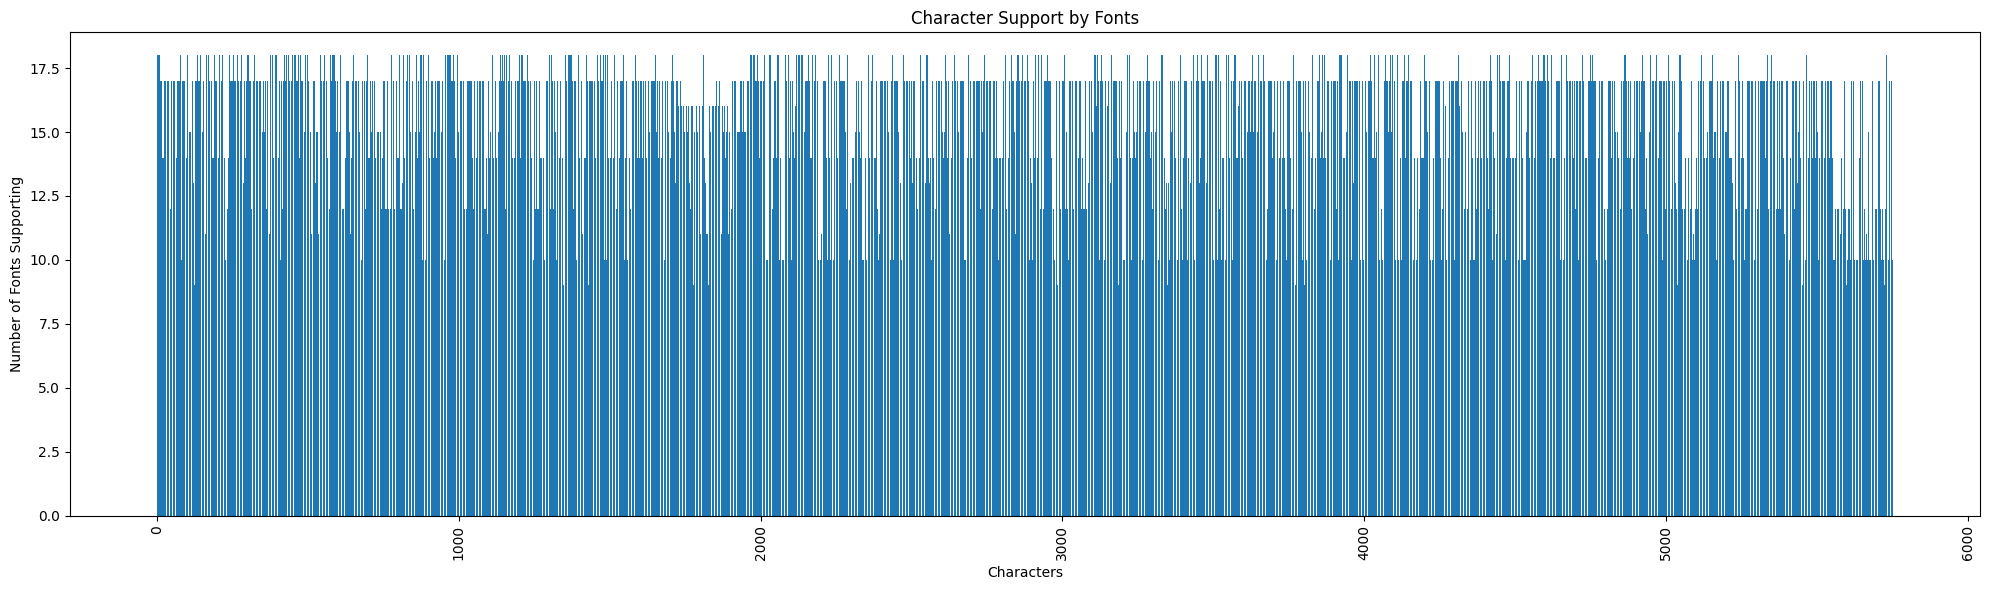

In [80]:
plot_histogram(character_font_counts)

Check rare characters

In [96]:
num_chars_tot = len(character_font_counts)

In [97]:
def check_n_representations(n):
    n_representations = sum(1 for char, count in character_font_counts
                                 if count == n)

    print(f"{n}-font representations: {n_representations}/{num_chars_tot} ({100*n_representations/num_chars_tot:.2f}%)")

    return n_representations

In [98]:
n_representations = [check_n_representations(n) for n in range(1, num_fonts+1)]

1-font representations: 0/5684 (0.00%)
2-font representations: 0/5684 (0.00%)
3-font representations: 0/5684 (0.00%)
4-font representations: 0/5684 (0.00%)
5-font representations: 0/5684 (0.00%)
6-font representations: 0/5684 (0.00%)
7-font representations: 0/5684 (0.00%)
8-font representations: 0/5684 (0.00%)
9-font representations: 0/5684 (0.00%)
10-font representations: 469/5684 (8.25%)
11-font representations: 102/5684 (1.79%)
12-font representations: 459/5684 (8.08%)
13-font representations: 102/5684 (1.79%)
14-font representations: 908/5684 (15.97%)
15-font representations: 366/5684 (6.44%)
16-font representations: 126/5684 (2.22%)
17-font representations: 2295/5684 (40.38%)
18-font representations: 857/5684 (15.08%)


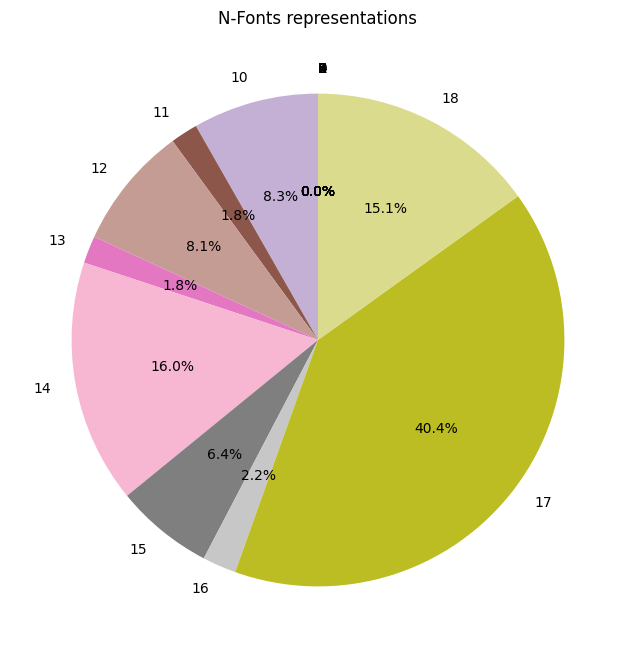

In [99]:
percentages = [num / num_chars_tot * 100 for num in n_representations]
labels = [f"{i+1}" for i in range(num_fonts)]
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
plt.title("N-Fonts representations")
plt.show()


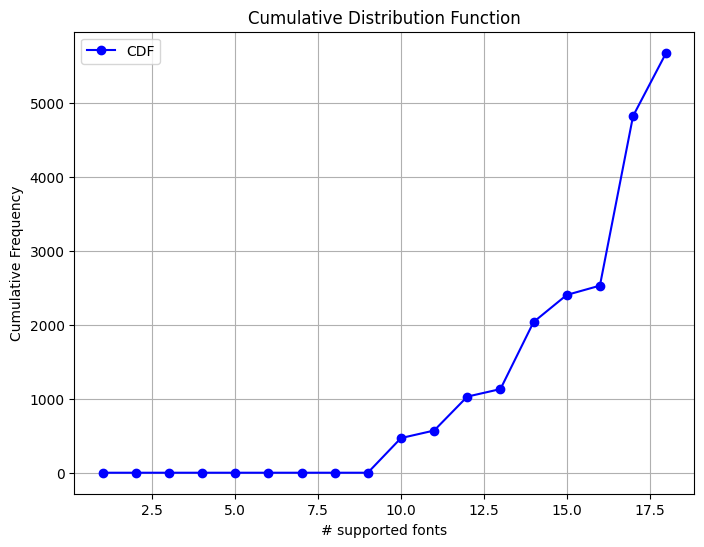

In [100]:
cumulative_sums = np.cumsum(n_representations)
x_values = range(1, num_fonts + 1)
plt.figure(figsize=(8, 6))
plt.plot(x_values, cumulative_sums, marker='o', linestyle='-', color='b', label='CDF')
plt.title("Cumulative Distribution Function")
plt.xlabel("# supported fonts")
plt.ylabel("Cumulative Frequency")
plt.grid(True)
plt.legend()
plt.show()

In [87]:
def count_characters_per_font():
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()

    # Query to count the number of characters each font supports
    cursor.execute(
        """
        SELECT font_id, COUNT(character_id) AS character_count
        FROM font_support
        GROUP BY font_id
        """
    )

    results = cursor.fetchall()
    for font_id, character_count in results:
        print(f"Font ID {font_id} supports {character_count} characters ({character_count/num_chars_tot * 100:.2f}%).")

    conn.close()

    return results

In [88]:
characters_per_font = count_characters_per_font()

Font ID 2 supports 5754 characters (100.00%).
Font ID 3 supports 3867 characters (67.21%).
Font ID 4 supports 4767 characters (82.85%).
Font ID 5 supports 5084 characters (88.36%).
Font ID 6 supports 906 characters (15.75%).
Font ID 7 supports 5754 characters (100.00%).
Font ID 8 supports 5630 characters (97.84%).
Font ID 9 supports 4901 characters (85.18%).
Font ID 10 supports 5754 characters (100.00%).
Font ID 11 supports 5754 characters (100.00%).
Font ID 12 supports 5754 characters (100.00%).
Font ID 13 supports 5754 characters (100.00%).
Font ID 14 supports 5754 characters (100.00%).
Font ID 15 supports 5026 characters (87.35%).
Font ID 16 supports 3868 characters (67.22%).
Font ID 17 supports 4870 characters (84.64%).
Font ID 18 supports 4870 characters (84.64%).
Font ID 19 supports 3868 characters (67.22%).


## Inspect: Radicals distribution

In [38]:
def get_radical_character_counts():
    """Get the count of characters grouped by radical from the database."""
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()

    # Fetch the radical and its associated character count
    cursor.execute(
        """
        SELECT radical, COUNT(character)
        FROM characters
        GROUP BY radical
        """
    )
    radical_counts = cursor.fetchall()
    conn.close()

    return radical_counts

In [40]:
radical_counts = get_radical_character_counts()

In [41]:
radical_counts

[('一', 25),
 ('丨', 9),
 ('丶', 6),
 ('丿', 13),
 ('乙', 15),
 ('亅', 4),
 ('二', 14),
 ('亠', 15),
 ('人', 438),
 ('儿', 23),
 ('入', 5),
 ('八', 12),
 ('冂', 11),
 ('冖', 10),
 ('冫', 32),
 ('几', 8),
 ('凵', 7),
 ('刀', 104),
 ('力', 55),
 ('勹', 17),
 ('匕', 4),
 ('匚', 19),
 ('匸', 8),
 ('十', 16),
 ('卜', 8),
 ('卩', 17),
 ('厂', 30),
 ('厶', 5),
 ('又', 17),
 ('口', 484),
 ('囗', 47),
 ('土', 284),
 ('士', 14),
 ('夂', 2),
 ('夊', 7),
 ('夕', 12),
 ('大', 48),
 ('女', 323),
 ('子', 32),
 ('宀', 86),
 ('寸', 14),
 ('小', 11),
 ('尢', 9),
 ('尸', 42),
 ('屮', 2),
 ('山', 226),
 ('巛', 7),
 ('工', 7),
 ('己', 7),
 ('巾', 79),
 ('干', 6),
 ('幺', 5),
 ('广', 87),
 ('廴', 5),
 ('廾', 10),
 ('弋', 5),
 ('弓', 42),
 ('彐', 7),
 ('彡', 14),
 ('彳', 56),
 ('心', 414),
 ('戈', 34),
 ('户', 16),
 ('手', 520),
 ('支', 3),
 ('攴', 52),
 ('文', 9),
 ('斗', 10),
 ('斤', 15),
 ('方', 26),
 ('无', 3),
 ('日', 184),
 ('曰', 16),
 ('月', 28),
 ('木', 690),
 ('欠', 50),
 ('止', 11),
 ('歹', 40),
 ('殳', 17),
 ('毋', 7),
 ('比', 5),
 ('毛', 37),
 ('氏', 4),
 ('气', 5),
 ('水', 792)

In [42]:
def sanity_check_radical_counts():
    """Check if the sum of all radical counts equals the total number of characters."""
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()

    # Sum of all character counts grouped by radical
    cursor.execute(
        """
        SELECT SUM(count)
        FROM (
            SELECT COUNT(character) AS count
            FROM characters
            GROUP BY radical
        )
        """
    )
    radical_total = cursor.fetchone()[0]

    # Total number of characters in the Characters table
    cursor.execute("SELECT COUNT(character) FROM characters")
    character_total = cursor.fetchone()[0]

    conn.close()

    # Compare totals
    if radical_total == character_total:
        print(f"Sanity check passed: Total radicals count ({radical_total}) matches total characters ({character_total}).")
        return True
    else:
        print(f"Sanity check failed: Total radicals count ({radical_total}) does not match total characters ({character_total}).")
        return False


In [43]:
sanity_check_radical_counts()

Sanity check passed: Total radicals count (13664) matches total characters (13664).


True

In [117]:
def plot_3d_radical_histogram(radical_counts):

    sorted_counts = sorted(radical_counts, key=lambda x: x[1], reverse=False)

    radicals, counts = zip(*sorted_counts)

    num_radicals = len(radicals)

    grid_size = int(np.ceil(np.sqrt(num_radicals)))

    x_coords, y_coords = np.meshgrid(range(grid_size), range(grid_size))

    x_coords = x_coords.flatten()[:num_radicals]

    y_coords = y_coords.flatten()[:num_radicals]

    norm = Normalize(vmin=min(counts), vmax=max(counts))
    cmap = cm.viridis
    colors = [cmap(norm(count)) for count in counts]

    fig = plt.figure(figsize=(20, 18))

    ax = fig.add_subplot(111, projection='3d')

    bar_width = 0.5

    # Create bars with sorted data, but invert the z-axis height by subtracting from the max count
    ax.bar3d(x_coords, y_coords, np.zeros_like(counts), bar_width, bar_width, counts, color=colors, shade=True)

    for x, y, count, rad in zip(x_coords, y_coords, counts, radicals):

        ax.text(x, y, count + 1, rad, ha='center', va='bottom', fontsize=14, fontweight='bold', fontproperties=fprop)

    ax.set_xlabel('X')

    ax.set_ylabel('Y')

    ax.set_zlabel('Count')

    ax.set_title('Radicals count distribution')

    ax.set_xticks(range(grid_size))

    ax.set_yticks(range(grid_size))

    ax.set_zlim(0, max(counts) + 5)

    plt.show()

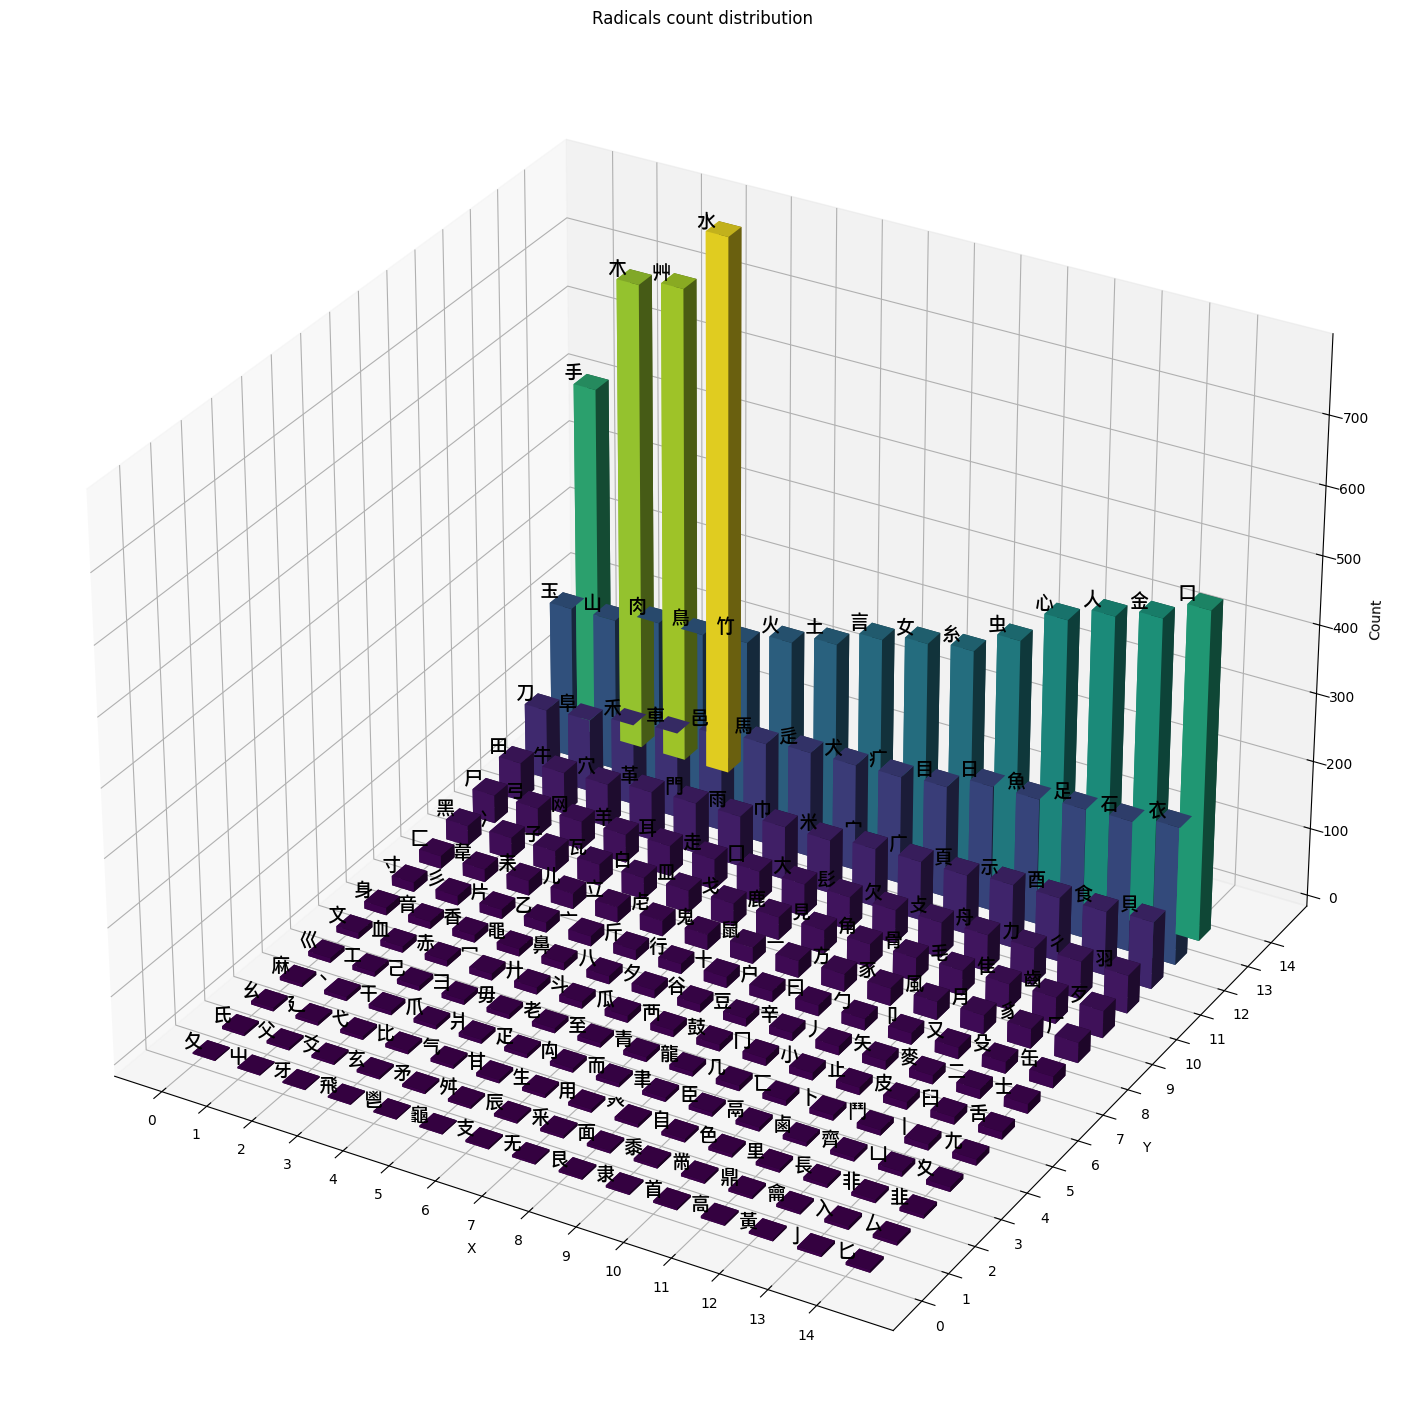

In [123]:
 plot_3d_radical_histogram(radical_counts)

## Inspect: Annotations

In [11]:
def display_annotated(img_num):
    """
    Draw bounding boxes on an image based on the information in a text file
    and display the result in the current notebook.

    :param txt_file: Path to the text file containing bounding box data.
    """
    # Derive the image file name from the text file name
    txt_file = os.path.join("output",f"{str(img_num)}.txt")
    image_file = txt_file.replace('.txt', '.png')

    # Check if the image file exists
    if not os.path.exists(image_file):
        print(f"Image file '{image_file}' not found.")
        return

    # Load the image
    image = cv2.imread(image_file)

    if image is None:
        print(f"Failed to load the image '{image_file}'.")
        return

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(image_rgb)

    # Open and parse the text file
    with open(txt_file, 'r', encoding='utf-8') as file:
        for line in file:
            # Split each line into parts
            parts = line.strip().split()

            if len(parts) < 6:
                print(f"Skipping malformed line: {line}")
                continue

            # Extract relevant data
            char, center_x, center_y, width, height, *font_info = parts

            # Convert to numeric types
            center_x = float(center_x)
            center_y = float(center_y)
            width = float(width)
            height = float(height)

            # Compute top-left corner and dimensions of the bounding box
            x1 = center_x - width / 2
            y1 = center_y - height / 2

            # Draw the bounding box
            rect = patches.Rectangle((x1, y1), width, height, linewidth=1,
                                     edgecolor='green', facecolor='none')
            ax.add_patch(rect)

            # Add the character as text above the bounding box
            ax.text(x1, y1 - 5, char, fontsize=12, fontproperties=fprop,
                    color='red', verticalalignment='bottom')

    # Hide axes for better visualization
    ax.axis('off')
    plt.title(f"Annotated {img_num}")
    plt.show()


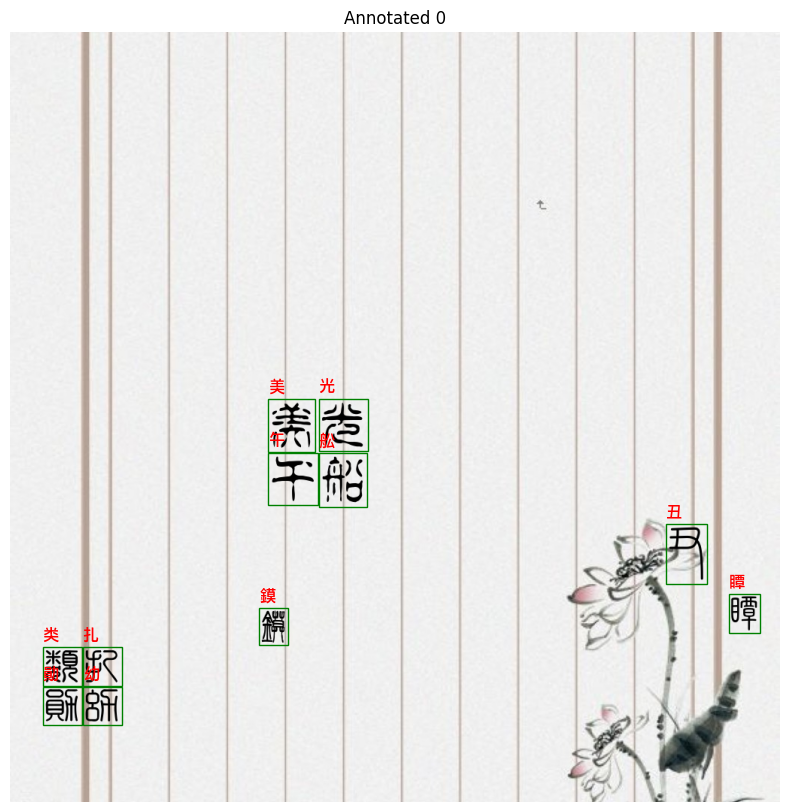

In [35]:
display_annotated(0)

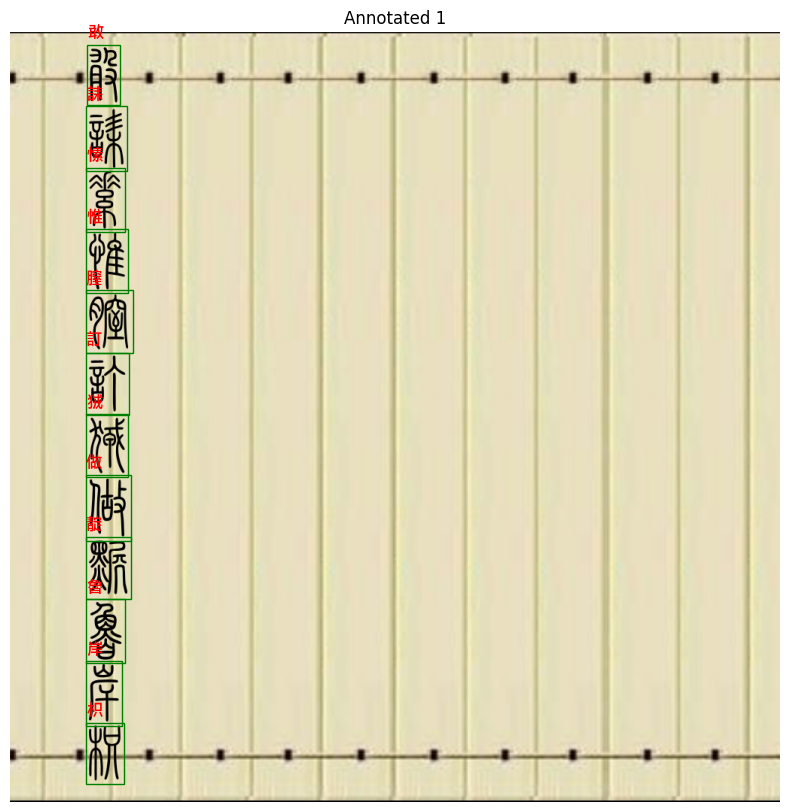

In [34]:
display_annotated(1)